In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_product=pd.read_csv('/content/Product Launch Dataset.csv',encoding='unicode-escape')
df_product.sample(10)

,market_subcategory,id,eventdate,country,positioning,region,flavor
104031,Carbonates,104032,01-09-2014,Vietnam,"Low Sodium, Convenience - Consumption, Ethical...",Asia,Cola
71060,Bottled Water - Flavoured,71061,01-01-2013,South Korea,"Low Calorie, No Trans Fats, Sugar Free, Conven...",Asia,Lime
17465,Juice & Juice Drinks,17466,01-06-2008,Germany,"Juice Drinks (up to 25% juice), Convenience - ...",West Europe,"Superfruit, pomegranate; Superfruit, Acerola"
94716,Juice & Juice Drinks,94717,01-08-2011,United States,"100% Not from Concentrate, Allergy, Gluten Fre...",North America,Tangerine; Clementine; Mandarin
59468,Juice & Juice Drinks,59469,01-05-2013,Colombia,"Ethical - Packaging, Convenience - Consumption",Latin America,"Berry, Blackberry"
107676,Drink Concentrates & Mixes,107677,01-09-2013,India,"Dry, Convenience - Easy-to-Prepare, Vegetarian",Asia,Pineapple
16018,Juice & Juice Drinks,16019,01-11-2010,Netherlands,100% Reconstituted,West Europe,"Apple, red; Pear"
105872,Juice & Juice Drinks,105873,01-04-2013,United States,"Nectars (25-99% juice), Gluten Free, HFCS Free...",North America,"Berry, Not specified"
31491,Juice & Juice Drinks,31492,01-07-2007,United States,"100% Not from Concentrate, Kosher, Indulgent a...",North America,"Orange, not specified"
63525,Drink Concentrates & Mixes,63526,01-08-2013,South Africa,"No Additives/Preservatives, Convenience - Easy...",Africa,"Orange, Not specified"


In [ ]:
df_product.shape

(114689, 7)

In [ ]:
df_product[df_product['flavor'].str.contains('||')==True].head(2)

,market_subcategory,id,eventdate,country,positioning,region,flavor,eventyear
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified",2005
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified",2005


In [ ]:
percent_missing = df_product.isnull().sum() * 100 / len(df_product)
print(percent_missing)

market_subcategory    0.000000
id                    0.000000
eventdate             0.000000
country               0.000000
positioning           3.759733
region                0.000000
flavor                1.722920
dtype: float64



**DROPPING FLAVOR COLUMN ENTRIES HAVING NULL,AS THERE ARE VERY LESS OF THEM**

In [ ]:
df_product.dropna(subset=['flavor'],inplace=True)

In [ ]:
df_product.shape

(112713, 7)

In [ ]:
new_flavor = []
for i in df_product['flavor']:
  if '||' in i:
    i = i.replace('||',';')
    new_flavor.append(i)
  else:
    new_flavor.append(i)

In [ ]:
df_product['flavor']=new_flavor

In [ ]:
df_product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango


In [ ]:
df_product['eventyear']=pd.DatetimeIndex(df_product['eventdate']).year

**SEPERATING THE CLEANED DATASET(BASIC CLEANING)**

In [ ]:
df_product.to_csv('product_cleaned_data.csv')

**COLLECTING ALL THE AVAILABLE FLAVORS INTO A LIST**

In [ ]:
l = []
for i in df_product['flavor']:
  l.extend(i.split(';'))

### QUESTION 1(A)

**COUNTING THE NO OF UNIQUE FLAVORS**


**THERE ARE 1734 unique flavor  that have been sold over the years**

In [ ]:
uni_flv = set(l)
uni_flv.remove('')
uni_flv = list(uni_flv)

In [ ]:
print(len(uni_flv))

1734


### QUESTION 1(B)

In [ ]:
new_df=df_product.groupby(['eventyear','market_subcategory'])['market_subcategory'].count().unstack()

In [ ]:
len(new_df)

10

In [ ]:
new_df.reset_index(inplace=True)

In [ ]:
new_df

market_subcategory,eventyear,Bottled Water - Flavoured,Bottled Water - Unflavoured,Carbonates,Drink Concentrates & Mixes,Energy Drinks,Iced Coffee,Iced Tea,Juice & Juice Drinks,Other Soft Drinks,Other Soft Drinks,Sports Drinks RTD,Sports Others,Sports Powders,Sports Supplements
0,2005,459.0,407.0,1053.0,659.0,702.0,263.0,579.0,2730.0,230.0,1.0,342.0,4.0,46.0,NaN
1,2006,428.0,341.0,1030.0,689.0,366.0,242.0,751.0,2972.0,293.0,NaN,189.0,NaN,2.0,NaN
2,2007,515.0,358.0,875.0,791.0,423.0,230.0,707.0,3064.0,219.0,NaN,196.0,NaN,10.0,NaN
3,2008,588.0,358.0,765.0,1048.0,360.0,273.0,693.0,3454.0,232.0,NaN,212.0,NaN,11.0,NaN
4,2009,677.0,416.0,907.0,1214.0,509.0,221.0,646.0,4139.0,240.0,NaN,184.0,NaN,8.0,NaN
5,2010,617.0,477.0,1017.0,1723.0,455.0,423.0,944.0,4889.0,306.0,NaN,281.0,NaN,14.0,NaN
6,2011,684.0,528.0,1611.0,1818.0,534.0,482.0,1039.0,6121.0,336.0,NaN,310.0,NaN,25.0,NaN
7,2012,697.0,721.0,1911.0,1853.0,698.0,422.0,1101.0,6015.0,375.0,NaN,309.0,NaN,17.0,NaN
8,2013,982.0,908.0,1880.0,2206.0,874.0,672.0,1415.0,8177.0,430.0,NaN,229.0,2.0,33.0,NaN
9,2014,923.0,715.0,2312.0,1900.0,745.0,627.0,1350.0,7518.0,454.0,NaN,244.0,NaN,38.0,5.0


In [ ]:
new_df.fillna(0,inplace=True)

In [ ]:
new_df

market_subcategory,eventyear,Bottled Water - Flavoured,Bottled Water - Unflavoured,Carbonates,Drink Concentrates & Mixes,Energy Drinks,Iced Coffee,Iced Tea,Juice & Juice Drinks,Other Soft Drinks,Other Soft Drinks,Sports Drinks RTD,Sports Others,Sports Powders,Sports Supplements
0,2005,459.0,407.0,1053.0,659.0,702.0,263.0,579.0,2730.0,230.0,1.0,342.0,4.0,46.0,0.0
1,2006,428.0,341.0,1030.0,689.0,366.0,242.0,751.0,2972.0,293.0,0.0,189.0,0.0,2.0,0.0
2,2007,515.0,358.0,875.0,791.0,423.0,230.0,707.0,3064.0,219.0,0.0,196.0,0.0,10.0,0.0
3,2008,588.0,358.0,765.0,1048.0,360.0,273.0,693.0,3454.0,232.0,0.0,212.0,0.0,11.0,0.0
4,2009,677.0,416.0,907.0,1214.0,509.0,221.0,646.0,4139.0,240.0,0.0,184.0,0.0,8.0,0.0
5,2010,617.0,477.0,1017.0,1723.0,455.0,423.0,944.0,4889.0,306.0,0.0,281.0,0.0,14.0,0.0
6,2011,684.0,528.0,1611.0,1818.0,534.0,482.0,1039.0,6121.0,336.0,0.0,310.0,0.0,25.0,0.0
7,2012,697.0,721.0,1911.0,1853.0,698.0,422.0,1101.0,6015.0,375.0,0.0,309.0,0.0,17.0,0.0
8,2013,982.0,908.0,1880.0,2206.0,874.0,672.0,1415.0,8177.0,430.0,0.0,229.0,2.0,33.0,0.0
9,2014,923.0,715.0,2312.0,1900.0,745.0,627.0,1350.0,7518.0,454.0,0.0,244.0,0.0,38.0,5.0


**WE CAN CLEARLY OBSERVE THAT SPORTS DRINKS OTHER THAN RTD AND OTHER SOFT DRINKS SHOW A NEGATIVE TREND OVER THE YEARS**

<Figure size 576x360 with 0 Axes>

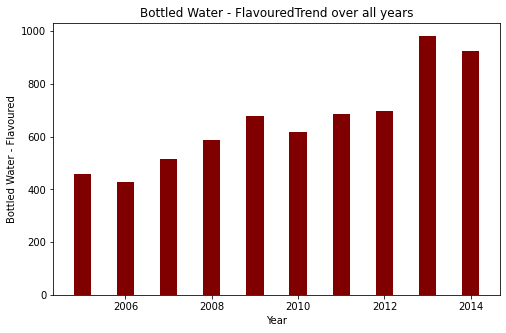

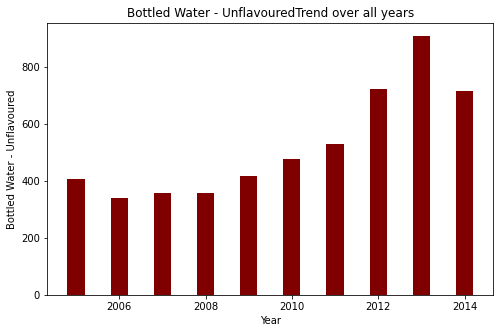

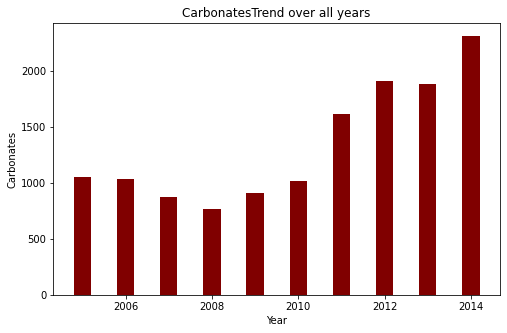

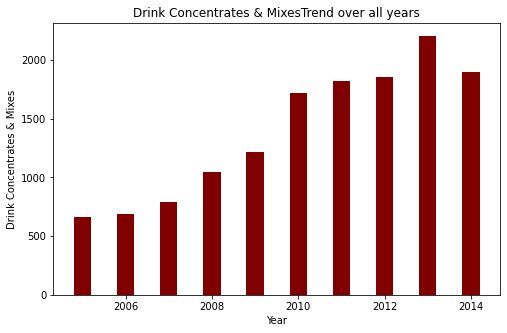

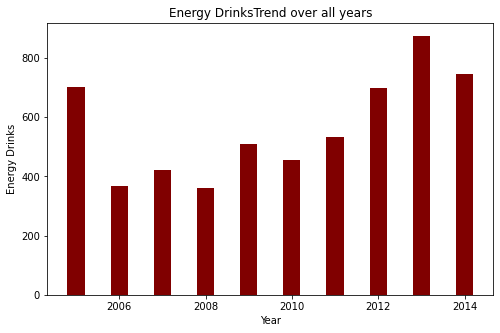

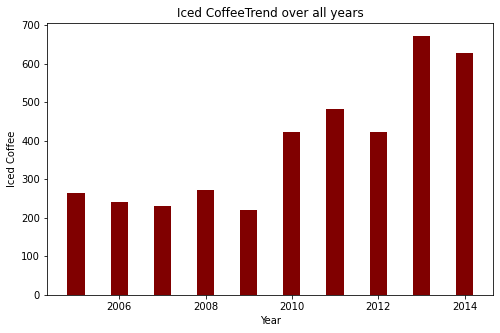

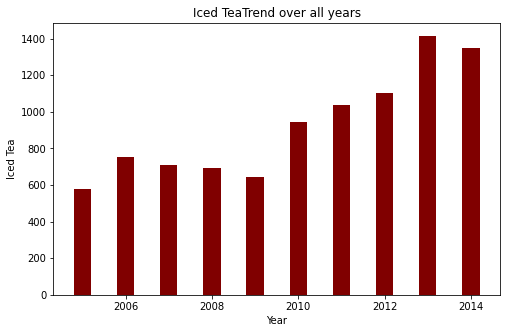

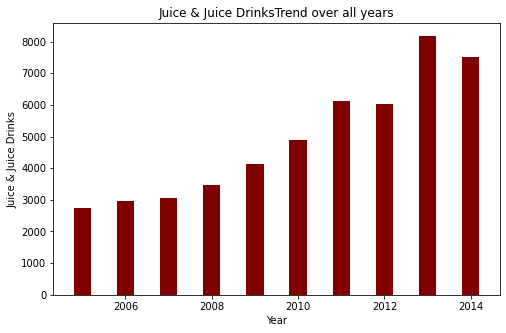

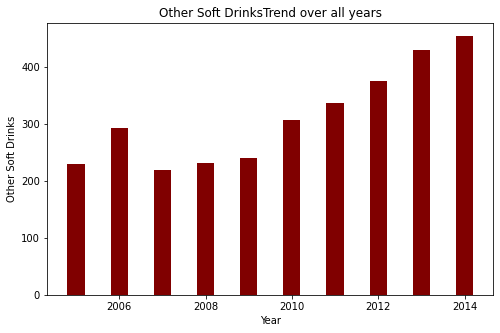

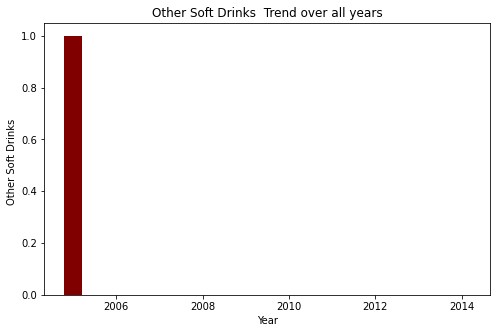

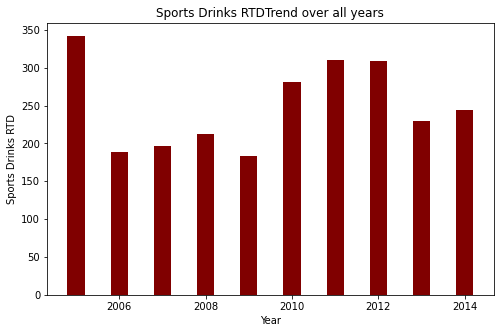

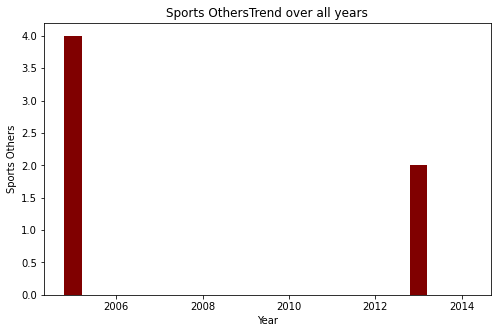

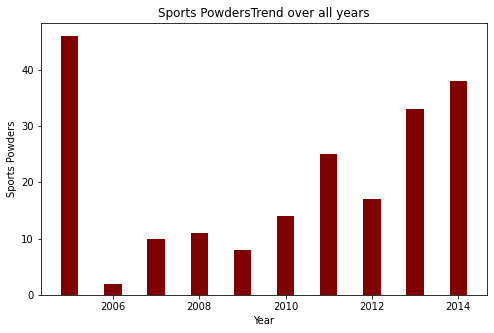

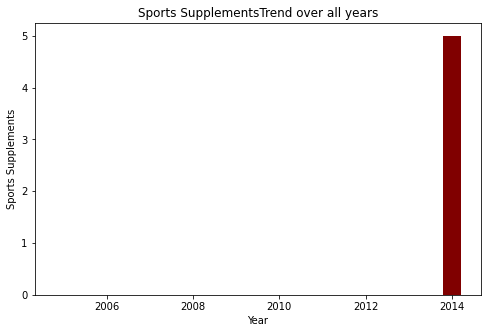

In [ ]:

for i in new_df.columns:
  
  fig = plt.figure(figsize = (8,5))
  
  if i!='eventyear':

    plt.bar(new_df['eventyear'],new_df[i], color ='maroon',
        width = 0.4)
    
    plt.xlabel("Year")
    plt.ylabel(i)
    plt.title(i+"Trend over all years")
    
    plt.show()
    
    print(' ')
    print(' ')
    print(' ')

  

In [ ]:
df_product['market_subcategory'].value_counts()

Juice & Juice Drinks           49079
Drink Concentrates & Mixes     13901
Carbonates                     13361
Iced Tea                        9225
Bottled Water - Flavoured       6570
Energy Drinks                   5666
Bottled Water - Unflavoured     5229
Iced Coffee                     3855
Other Soft Drinks               3115
Sports Drinks RTD               2496
Sports Powders                   204
Sports Others                      6
Sports Supplements                 5
Other Soft Drinks                  1
Name: market_subcategory, dtype: int64

### FOR QUESTION 1(C)

**THE SUBCATEGORY JUICE AND JUICE DRINKS HAS THE HIGHEST NO OF UNIQUE FLAVORS WITHIN IT**

In [ ]:
l1=[]
l2=[]

for i in df_product['market_subcategory'].unique():

  pos=df_product.index[df_product['market_subcategory']==i].tolist()
  
  for j in pos:
    l1.extend(df_product['flavor'].loc[j].split(';'))

  l2.append((i,len(set(l1))))
  l1=[]








In [ ]:
d1=dict(l2)
print(d1)

{'Other Soft Drinks': 625, 'Carbonates': 642, 'Juice & Juice Drinks': 1053, 'Drink Concentrates & Mixes': 1051, 'Bottled Water - Flavoured': 599, 'Energy Drinks': 454, 'Iced Coffee': 290, 'Iced Tea': 615, 'Sports Drinks RTD': 263, 'Bottled Water - Unflavoured': 15, 'Sports Others': 7, 'Sports Powders': 86, 'Other Soft Drinks  ': 2, 'Sports Supplements': 6}


In [ ]:
Keymax = max(d1, key= lambda x: d1[x])
print(Keymax)

Juice & Juice Drinks


### QUESTION 2

In [ ]:
df_flavor=pd.read_csv('/content/Flavor Classification Dataset.csv',encoding='unicode-escape')
df_flavor

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"
...,...,...
1440,Vegetable,"Yam, Purple"
1441,Vegetable,Yellow Wax Bean
1442,Vegetable,Yuca
1443,Vegetable,Yucca


In [ ]:
df_flavor['Flavor_Group'].unique()

array(['Alcohol', 'Brown Flavors', 'Cake, cookie & pie', 'Dairy Flavors',
       'Ethnic', 'Fantasy Flavors', 'Flowers', 'Fruit', 'Grains', 'Herbs',
       'Mint & Menthol', 'Nuts', 'Oil & Vinegar', 'Poultry, meat, fish',
       'Rice', 'Sauce & Condiment', 'Smoke & Roasted', 'Spices & Seeds',
       'Tea', 'Unflavored', 'Vanilla', 'Vegetable'], dtype=object)

In [ ]:
df_flavor[df_flavor['Flavor_Group']=='Fruit']

,Flavor_Group,flavor
516,Fruit,Abiu
517,Fruit,Akee
518,Fruit,Alibertia
519,Fruit,Aloe Vera
520,Fruit,"Apple, Golden"
...,...,...
776,Fruit,Wax Jambu
777,Fruit,Waxberry
778,Fruit,White Sapote
779,Fruit,Whortleberry


In [ ]:
df_product['unique_flavors']=df_product['flavor'].str.split(";")

In [ ]:
df_product['unique_flavors']

0         [Herbs, not specified,  Fruit, not specified]
1                                [Fruit, not specified]
2                              [Lemon,  Honey,  Ginger]
3                               [Mango,  Passion Fruit]
4                                               [Mango]
                              ...                      
114684                               [Berry, Wildberry]
114685                       [Raspberry, Not Specified]
114686                                     [Tea, White]
114687             [Tea, Green,  Citrus, Not Specified]
114688                          [Cherry, Not Specified]
Name: unique_flavors, Length: 112713, dtype: object

In [ ]:
df_product.head(11)

,market_subcategory,id,eventdate,country,positioning,region,flavor,unique_flavors
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified","[Herbs, not specified, Fruit, not specified]"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified","[Fruit, not specified]"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger,"[Lemon, Honey, Ginger]"
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit,"[Mango, Passion Fruit]"
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango,[Mango]
5,Juice & Juice Drinks,6,01-01-2005,Netherlands,"Nectars (25-99% juice), Low Calorie, Vitamin/M...",West Europe,"Fruit, not specified","[Fruit, not specified]"
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Fruit, not specified|| Lemonade, pink|| Cherry...","[Fruit, not specified|| Lemonade, pink|| Cherr..."
7,Juice & Juice Drinks,8,07-03-2005,Australia,"Nectars (25-99% juice), Antioxidant, Low Fat, ...",Australasia,"Apple, Red; Pineapple; Guava","[Apple, Red, Pineapple, Guava]"
8,Bottled Water - Flavoured,9,01-01-2005,United States,Convenience - Packaging,North America,"Cherry, Not specified; Vanilla, Not specified","[Cherry, Not specified, Vanilla, Not specified]"
9,Juice & Juice Drinks,10,01-01-2005,United States,"Low Calorie, Low Sugar",North America,"Orange, not specified","[Orange, not specified]"


In [ ]:
df_product.shape

(114689, 8)

In [ ]:
type(df_product['flavor'].str.split(";"))

pandas.core.series.Series

In [ ]:
df_product['eventdate'].dtype

dtype('O')

In [ ]:
df_product['eventyear']=pd.DatetimeIndex(df_product['eventdate']).year

In [ ]:
df_product[df_product['flavor'].str.contains('energy')==True]

,market_subcategory,id,eventdate,country,positioning,region,flavor,eventyear


In [ ]:
df_product_2013=df_product[df_product['eventyear']==2013]
df_product_2013_Canada=df_product_2013[df_product_2013['region']=='Canada']


In [ ]:
df_product_2013.tail(2)

,market_subcategory,id,eventdate,country,positioning,region,flavor,eventyear,unique_flavors
114613,Carbonates,114614,01-09-2013,Singapore,"No Additives/Preservatives, Immune Health, Wei...",Asia,"Vinegar, Not Specified; Honey",2013,"[Vinegar, Not Specified, Honey]"
114625,Iced Tea,114626,01-05-2013,United States,"Indulgent and Premium, Traditional, Natural, N...",North America,"Tea, Black; Lemon",2013,"[Tea, Black, Lemon]"


In [ ]:
sales_trend=pd.DataFrame(data=df_product['eventyear'].value_counts())
sales_trend['eventyear']=sales_trend.index
sales_trend

Int64Index([2013, 2014, 2012, 2011, 2010, 2009, 2005, 2008, 2007, 2006], dtype='int64')


In [ ]:
product_flavor=pd.DataFrame(df_product.groupby('market_subcategory')['flavor'].nunique())
product_flavor['market_subcategory']=product_flavor.index
product_flavor.rename(columns = {'flavor':'count_of_unique_flavors'}, inplace = True)

In [ ]:
product_flavor.head()

,count_of_unique_flavors,market_subcategory
market_subcategory,,
Bottled Water - Flavoured,1687,Bottled Water - Flavoured
Bottled Water - Unflavoured,10,Bottled Water - Unflavoured
Carbonates,2022,Carbonates
Drink Concentrates & Mixes,4011,Drink Concentrates & Mixes
Energy Drinks,1033,Energy Drinks


In [ ]:
df_product.head()

,market_subcategory,id,eventdate,country,positioning,region,flavor
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified"
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified"
2,Juice & Juice Drinks,3,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Lemon; Honey; Ginger
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit
4,Juice & Juice Drinks,5,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango


In [ ]:
df_product.groupby('market_subcategory')['flavor'].nunique()

market_subcategory
Bottled Water - Flavoured      1687
Bottled Water - Unflavoured      10
Carbonates                     2022
Drink Concentrates & Mixes     4011
Energy Drinks                  1033
Iced Coffee                     718
Iced Tea                       2808
Juice & Juice Drinks           9479
Other Soft Drinks              1196
Other Soft Drinks                 1
Sports Drinks RTD               493
Sports Others                     5
Sports Powders                   76
Sports Supplements                5
Name: flavor, dtype: int64

In [ ]:
df_flavor=pd.read_csv('/content/Flavor Classification Dataset.csv',encoding='unicode-escape')
df_flavor.head(10)

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"
5,Alcohol,"Beer, Amber"
6,Alcohol,"Beer, Amber Ale"
7,Alcohol,"Beer, Amstel"
8,Alcohol,"Beer, Black"
9,Alcohol,"Beer, Blonde"


In [ ]:
df_flavor.head()

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"


In [ ]:
df_flavor.shape

(1445, 2)

In [ ]:
df_flavor['flavor'].nunique()

1430

In [ ]:
df_flavor[df_flavor.duplicated()==True]

,Flavor_Group,flavor
26,Alcohol,"Beer, Malt"
34,Alcohol,"Beer, Porter"
43,Alcohol,"Beer, White"
58,Alcohol,"Cocktail, Caipirinha"
61,Alcohol,"Cocktail, Daiquiri"
64,Alcohol,"Cocktail, Mai Tai"
66,Alcohol,"Cocktail, Margarita"
70,Alcohol,"Cocktail, Mojito"
74,Alcohol,"Cocktail, Pina Colada"
82,Alcohol,Cognac


In [ ]:
df_flavor[df_flavor['flavor']=='Beer, Malt']

,Flavor_Group,flavor
25,Alcohol,"Beer, Malt"
26,Alcohol,"Beer, Malt"


In [ ]:
df_flavor.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_flavor.duplicated().sum()

0

**ANALYSE FOR THE FRUIT FLAVOR SPECIFICALLY**

In [ ]:
df_prod_fruit=df_product[df_product['flavor'].str.contains('Fruit')==True]
df_prod_fruit

,market_subcategory,id,eventdate,country,positioning,region,flavor,eventyear,eventquarter
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified",2005,1
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified",2005,1
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit,2005,1
5,Juice & Juice Drinks,6,01-01-2005,Netherlands,"Nectars (25-99% juice), Low Calorie, Vitamin/M...",West Europe,"Fruit, not specified",2005,1
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Fruit, not specified|| Lemonade, pink|| Cherry...",2005,1
...,...,...,...,...,...,...,...,...,...
114597,Juice & Juice Drinks,114598,01-01-2014,United States,"Nectars (25-99% juice), Allergy, Gluten Free, ...",North America,"Vegetables, Not Specified; Fruit, Not Specified",2014,1
114616,Juice & Juice Drinks,114617,01-11-2014,Ghana,"Nectars (25-99% juice), No Additives/Preservat...",Africa,"Tropical Fruit, Not Specified; Orange, Not Spe...",2014,1
114665,Bottled Water - Flavoured,114666,01-07-2014,United States,"Low Calorie, Convenience - Packaging, Kosher",North America,"Strawberry; Fruit, Not Specified",2014,1
114668,Juice & Juice Drinks,114669,01-12-2014,Ghana,"No Additives/Preservatives, High/Source of Fib...",Africa,Pineapple; Passion Fruit; Kiwi,2014,1


In [ ]:
pd.DatetimeIndex(df_product['eventdate']).quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='eventdate', length=114689)

In [ ]:
df_prod_fruit['eventquarter']=pd.DatetimeIndex(df_prod_fruit['eventdate']).quarter
df_prod_fruit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,market_subcategory,id,eventdate,country,positioning,region,flavor,eventyear,eventquarter
0,Other Soft Drinks,1,01-01-2005,Netherlands,"Low Calorie, Natural",West Europe,"Herbs, not specified; Fruit, not specified",2005,1
1,Carbonates,2,01-01-2005,Ireland,Convenience - Consumption,West Europe,"Fruit, not specified",2005,1
3,Juice & Juice Drinks,4,01-01-2005,Ireland,"100% Not from Concentrate, Convenience - Consu...",West Europe,Mango; Passion Fruit,2005,1
5,Juice & Juice Drinks,6,01-01-2005,Netherlands,"Nectars (25-99% juice), Low Calorie, Vitamin/M...",West Europe,"Fruit, not specified",2005,1
6,Drink Concentrates & Mixes,7,01-06-2005,United States,"Dry, Low Fat, Low Sodium, Low Calorie, Low Carb",North America,"Fruit, not specified|| Lemonade, pink|| Cherry...",2005,1


In [ ]:
df_flavor=pd.read_csv('/content/Flavor Classification Dataset.csv',encoding='unicode-escape')
df_flavor.head()

,Flavor_Group,flavor
0,Alcohol,"Vodka, Citron"
1,Alcohol,Bacardi
2,Alcohol,"Bacardi, Gold"
3,Alcohol,"Bacardi, Silver"
4,Alcohol,"Beer, Ale"


In [ ]:
df_flavor[df_flavor['Flavor_Group']=='Fruit']

,Flavor_Group,flavor
516,Fruit,Abiu
517,Fruit,Akee
518,Fruit,Alibertia
519,Fruit,Aloe Vera
520,Fruit,"Apple, Golden"
...,...,...
776,Fruit,Wax Jambu
777,Fruit,Waxberry
778,Fruit,White Sapote
779,Fruit,Whortleberry


**MOST OF THE PRODUCT LAUNCHES FOR FRUIT FLAVOR ARE IN THE 1ST QUARTER**

###Question NO 3

In [ ]:
df_product.groupby('id')['positioning'].nunique()

id
1         1
2         1
3         1
4         1
5         1
         ..
114685    1
114686    1
114687    1
114688    1
114689    1
Name: positioning, Length: 114689, dtype: int64

In [ ]:
df_product['positioning'].value_counts()

Convenience - Consumption                                                                                                                  9673
Juice Drinks (up to 25% juice), Convenience - Consumption                                                                                  2932
Juice Drinks (up to 25% juice)                                                                                                             1912
Convenience - Easy-to-Prepare                                                                                                              1651
Nectars (25-99% juice)                                                                                                                     1567
                                                                                                                                           ... 
Juice Drinks (up to 25% juice), High/Source of Fibre, Added Protein, Weight Management, Convenience - Packaging, High/Source of Protein 

In [ ]:
df_position=pd.read_csv('/content/Positioning Category Mapping Dataset.csv',encoding='unicode-escape')
df_position['Positioning Group'].value_counts()

Supplements                  24
Health (Passive)             22
Health (Active)              22
Others                        7
Age                           6
Juice                         5
Convenience                   5
Ethical                       5
Choice                        4
Pleasure                      4
Gender                        2
Convenience  Packaging       2
Convenience  Preparation     2
Price Positioning             2
Co-Branding                   1
Seasonal/In-Out Products      1
Name: Positioning Group, dtype: int64

In [ ]:
df_position[df_position['Positioning Group']=='Convenience']

,Positioning Group,Positioning Subcategory
92,Convenience,Convenience - Consumption
93,Convenience,Convenience - Easy-to-Prepare
94,Convenience,Convenience - Packaging
95,Convenience,Convenience - Ready Prepared
96,Convenience,Convenience - Time Saving


In [ ]:
df_product[(df_product['positioning'].str.contains('Convenience- Consumption'))==True]

,market_subcategory,id,eventdate,country,positioning,region,flavor
